1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

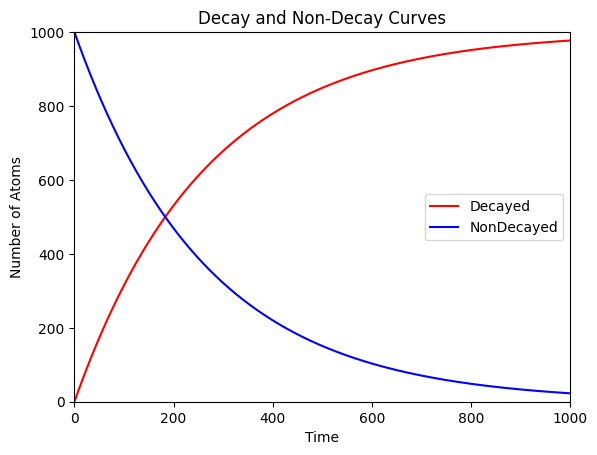

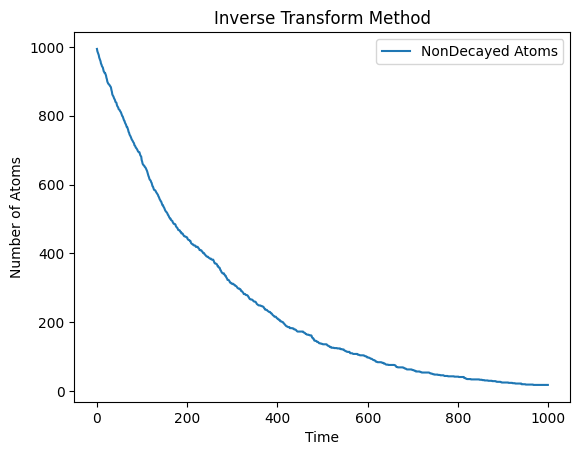

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

tau = 3.052 * 60
N = 1000

def decays(x):
    return N * (1 - 2 ** (-x / tau))

time_values = np.linspace(0, 1000, 1000)
plt.plot(time_values, decays(time_values), color='r', label='Decayed')
plt.plot(time_values, N - decays(time_values), color='b', label='NonDecayed')
plt.xlabel('Time')
plt.ylabel('Number of Atoms')
plt.axis([0, 1000, 0, 1000])
plt.legend()
plt.title('Decay and Non-Decay Curves')
plt.show()

u = np.random.random(1000)
v = -tau * np.log2(1 - np.sort(u))
counts, edges = np.histogram(v, bins=time_values)

decayed_T = np.cumsum(counts)
not_decayed = N - decayed_T
time_values = edges[:-1]

plt.plot(time_values, not_decayed, label='NonDecayed Atoms')
plt.xlabel('Time')
plt.ylabel('Number of Atoms')
plt.title('Inverse Transform Method')
plt.legend()
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Error: 0.0029654846639867406
The Result With Mean Value Method = 1.3421346351322971
Error: 0.0


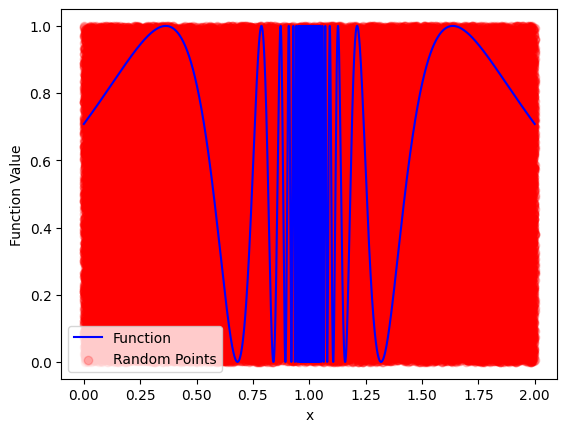

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return (np.sin(1 / (1 - x))) ** 2

x_values = np.linspace(0.00001, 1.99999, 100000)
plt.plot(x_values, func(x_values), color='b', label='Function')

N = 99999
x_random = 2 * np.random.random(N)
y_random = np.random.random(N)
count = np.sum(y_random < func(x_random))

error = (1 - (-1)) * np.sqrt(N * (count / N) * (1 - count / N)) / N
print("Error:", error)

x_array = 2 * np.random.random(N)
y_array = func(x_array)

I_2 = (1 - (-1)) * np.sum(y_array) / N

error_array = (1 - (-1)) * np.sqrt((np.mean(y_array * 2) - np.mean(y_array) * 2) / N)

print('The Result With Mean Value Method =', I_2)
print('Error:', error_array)

plt.scatter(x_random, y_random, color='r', alpha=0.2, label='Random Points')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()
plt.show()


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
N = 99999
dim = 2

points_2d = 2 * np.random.rand(N, dim) - 1
count_2d = np.sum(np.sum(points_2d**2, axis=1) <= 1)

area_2d = ((2**dim) / N) * count_2d
print('Area for the circle for 2 dimensions:', area_2d)

def for_10th():
    points_10d = np.random.rand(N, dim)**2
    count_10d = np.sum(np.sum(points_10d, axis=1) <= 1)
    return (2**dim) * (count_10d / N)

area_10d = for_10th()
print('Area for the circle for 10 dimensions:', area_10d)


Area for the circle for 2 dimensions: 3.131711317113171
Area for the circle for 10 dimensions: 3.148231482314823


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [11]:
def integral_function(x):
    return (x**(-0.5))/(np.exp(x)+1) 

def weight_function(x):
    return 1/np.sqrt(x)

a = 0
b = 1
N = 1000

samples = np.random.uniform(a, b, N)**2
result = 2 * np.sum(integral_function(samples) / weight_function(samples)) / N

print("Result:", result)


Result: 0.8348164443693739
